# **6.8701 | 6.8700 | HST.507**

#**Fall 2022 Problem Set 1: Aligning and Modeling Genomes**

Due: Wednesday, September 28 at 11:59PM (submit copy of notebook to Canvas)

#Load libraries


In [ ]:
from google.colab import files
from math import log
import matplotlib.pyplot as plt
import io, random
import numpy as np

#Evolutionary distances of orthologs and paralogs

In this problem, you will implement the Needleman-Wunsch algorithm for pairwise sequence alignment, apply it to the protein-coding sequences of related genes from several mammalian genomes, and use the results to learn about their evolution.

**A) Below is a python skeleton program that you need to complete. We provide a traceback routine, but you will write the code to fill in the score and traceback matrices. The skeleton program specifies a substitution matrix and gap penalty.**

In [ ]:
base_idx = { 'A' : 0, 'G' : 1, 'C' : 2, 'T' : 3 }
PTR_NONE, PTR_GAP1, PTR_GAP2, PTR_BASE = 0, 1, 2, 3
S = [
	# A  G   C   T
	[3, -1, -2, -2], # A
	[-1, 3, -2, -2], # G
	[-2, -2, 3, -1], # C
	[-2, -2, -1, 3]  # T
	]
gap_pen = 4

def readSeq(file):
	"""reads in a FASTA sequence"""
	seq = []
	for line in file.splitlines():
		if line.startswith(">"):
			continue
		seq.append(line.rstrip())
	return "".join(seq)

def traceback(seq1,seq2,TB):
	s1, s2 = "", ""
	i, j = len(seq1), len(seq2)
	while TB[i][j] != PTR_NONE:
		if TB[i][j] == PTR_BASE:
			s1 = seq1[i-1] + s1
			s2 = seq2[j-1] + s2
			i -= 1
			j -= 1
		elif TB[i][j] == PTR_GAP1:
			s1 = '-' + s1
			s2 = seq2[j-1] + s2
			j -= 1
		elif TB[i][j] == PTR_GAP2:
			s1 = seq1[i-1] + s1
			s2 = '-' + s2
			i -= 1
		else: assert False

	return s1, s2

def getResults(seq1,seq2):
	score, F, TB = seqalignDP(seq1, seq2, S, gap_pen)
	s1, s2 = traceback(seq1, seq2, TB)
	return score, F, TB, s1, s2

def seqalignDP(seq1,seq2,subst_matrix,gap_pen):
	"""return the score of the optimal Needleman-Wunsch alignment for seq1 and seq2
	Note: gap_pen should be positive (it is subtracted)
	"""
	F = [[0 for j in range(len(seq2) + 1)] for i in range(len(seq1) + 1)]
	TB = [[PTR_NONE for j in range(len(seq2) + 1)] for i in range(len(seq1) + 1)]

	# initialize dynamic programming table for Needleman-Wunsch alignment (Durbin p.20)
	for i in range(1,len(seq1) + 1):
		F[i][0] = 0 - i * gap_pen
		TB[i][0] = PTR_GAP2 # indicates a gap in seq2
	for j in range(1,len(seq2) + 1):
		F[0][j] = 0 - j * gap_pen
		TB[0][j] = PTR_GAP1 # indicates a gap in seq1

	for i in range(1, len(seq1) + 1):
		pass
		# YOUR CODE HERE
		for j in range(1, len(seq2) + 1):
			xi=base_idx[seq1[i-1]]
			yi=base_idx[seq2[j-1]]
			dlist=[(F[i-1][j]-gap_pen),(F[i][j-1]-gap_pen),(F[i-1][j-1]+subst_matrix[xi][yi])]
			dmax=max(dlist)
			F[i][j]=dmax
			dindex=dlist.index(dmax)
			if dindex==0:
				TB[i][j]=PTR_GAP2
			elif dindex==1:
				TB[i][j]=PTR_GAP1
			else:
				TB[i][j]=PTR_BASE
		# Fill in the dynamic programming tables F and TB, starting at [1][1]
		# Hints: The first row and first column of the table F[i][0] and F[0][j] are dummies
		#        (see for illustration Durbin p.21, Figure 2.5, but be careful what you
		#         think of as rows and what you think of as columns)
		#        Hence, the bases corresponding to F[i][j] are actually seq1[i-1] and seq2[j-1].
		#        Use the dictionary base_idx to convert from the character to an index to
		#         look up entries of the substitution matrix.
		#        To get started, you can complete and run the algorithm filling in only F,
		#         and then figure out how to do TB.
	return F[len(seq1)][len(seq2)], F, TB

**B) Run the following code block to evaluate your Needleman-Wunsch algorithm implementation on two relatively simple sequences. If you make any edits to the code block, please restore it to the original version before turning it in.**

In [ ]:
seq1, seq2 = "CTAAGTACT", "CATTA"

score, F, TB, s1, s2 = getResults(seq1, seq2)

print("\n".join([str(score), s1, s2]))
for line in F:
	print(line)

-6
CTAAGTACT
C-AT-TA--
[0, -4, -8, -12, -16, -20]
[-4, 3, -1, -5, -9, -13]
[-8, -1, 1, 2, -2, -6]
[-12, -5, 2, -1, 0, 1]
[-16, -9, -2, 0, -3, 3]
[-20, -13, -6, -4, -2, -1]
[-24, -17, -10, -3, -1, -4]
[-28, -21, -14, -7, -5, 2]
[-32, -25, -18, -11, -8, -2]
[-36, -29, -22, -15, -8, -6]


The Hox cluster is a set of genes that are crucial in determining body plan formation during embryo development. They are found in all bilateral animals, in species as distant as the fruit fly. The fruit fly has one Hox cluster, while most vertebrates have four. It is thought that vertebrates have undergone two rounds of whole-genome duplication, giving rise to four Hox clusters from the ancestral one, although the hypothesis remains controversial.

In the remainder of this problem, you will use your Needleman-Wunsch implementation to analyze the sequences of several Hox genes, and estimate the date of the most recent vertebrate whole-genome duplication. In particular, we are interested in using the N-W alignment score as a distance metric between two sequences.

You will need to download the following [files](https://www.dropbox.com/sh/n0mhoinyc6vyhg4/AABJxeDjhF8RG-YBh1JTRTeia?dl=0) and upload them to colab using the following code block.

In [ ]:
hox_fa = files.upload()
for k, v in hox_fa.items():
    hox_fa[k] = readSeq(v.decode("utf-8"))

Saving human_HoxA13.fa to human_HoxA13.fa
Saving human_HoxD13.fa to human_HoxD13.fa
Saving mouse_HoxA13.fa to mouse_HoxA13.fa
Saving mouse_HoxD13.fa to mouse_HoxD13.fa


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**C) Make minor adjustments to your Needleman-Wunsch algorithm so that the score it computes can be interpreted as a distance metric. That is, the score of a sequence aligned with itself should be zero, all scores should be non-negative, and sequences that are more dissimilar should be given a score with a greater magnitude.**

In [ ]:
def seqalignDP(seq1,seq2,subst_matrix,gap_pen):
	F = [[0 for j in range(len(seq2) + 1)] for i in range(len(seq1) + 1)]
	TB = [[PTR_NONE for j in range(len(seq2) + 1)] for i in range(len(seq1) + 1)]

	for i in range(1,len(seq1) + 1):
		F[i][0] = 0 + i * gap_pen
		TB[i][0] = PTR_GAP2
	for j in range(1,len(seq2) + 1):
		F[0][j] = 0 + j * gap_pen
		TB[0][j] = PTR_GAP1

	for i in range(1,len(seq1) + 1):
		# YOUR CODE HERE
		for j in range(1, len(seq2) + 1):
			xi=base_idx[seq1[i-1]]
			yi=base_idx[seq2[j-1]]
			dlist=[(F[i-1][j]+gap_pen),(F[i][j-1]+gap_pen),(F[i-1][j-1]-subst_matrix[xi][yi])]
			dmin=min(dlist)
			#F[i][j]=dmin
			dindex=dlist.index(dmin)
			if dindex==0:
				F[i][j]=dmin
				TB[i][j]=PTR_GAP1
			elif dindex==1:
				F[i][j]=dmin
				TB[i][j]=PTR_GAP2
			elif xi==yi:
				F[i][j]=F[i-1][j-1]
				TB[i][j]=PTR_BASE
			else:
				F[i][j]=dmin
				TB[i][j]=PTR_BASE


	return F[len(seq1)][len(seq2)], F, TB

**D) When you believe that your Needleman-Wunsch implementation has been adjusted appropriately, run the following code block to compute the distance between the human HoxA13 gene and the mouse HoxA13 gene.**

In [ ]:
seq1, seq2 = hox_fa["human_HoxA13.fa"], hox_fa["mouse_HoxA13.fa"]

score, F, TB, s1, s2 = getResults(seq1, seq2)

print(score)
print("\n".join([ s1, s2]))

197
ATGACAGCCTCCGTGCTCCTCCACCCCCGCTGGATCGAGCCCACCGTCATGTTTCTCTACGACAACGGCGGCGGCCTGGTGGCCGACGAGCTCAACAAGAACATGGAAGGGGCGGCGGCGGCTGCAGCAGCGGCTGCAGCGGCGGCGGCTGCCGGGGCCGGGGGCGGGGGCTTCCCCCACCCGGCGGCTGCGGCGGCAGGGGGCAACTTCTCGGTGGCGGCGGCGGCCGCGGCTGCGGCGGCGGCCGCGGCCAACCAGTGCCGCAACCTGATGGCGCACCCGGCGCCCTTGGCGCCAGGAGCCGCGTCCGCCTACAGCAGCGCCCCCGGGGAGGCGCCCCCGTCGGCTGCCGCCGCTGCTGCCGCGGCTGCCGCTGCAGCCGCCGCCGCCGCCGCCGCGTCGTCCTCGGGAGGTCCCGGCCCGGCGGGCCCGGCGGGCGCAGAGGCCGCCAAGCAATGCAGCCCCTGCTCGGCAGCGGCGCA-G--A--------G---CT---------C--G-TCG-G------G----G--------C--C--C-GCGGC-G-C---T---------G--C--C-----C-T-------------------------------------------------A----------------T---------GGCT-------------------A---CT---T-------------------------------------C---G--G----C--A--GCG------G-----CT-----------A------C-T-------------------A-------------------C-CCGT-G-CG-C-CCGCA-------------------------------T--------------------GGG-CC-C----G-C-A---C-CC---CA----A---------------C-GC-C--A--------------------------T----C-A-------

**E) The modern mammalian genes HoxA13 and HoxD13 arose from a single ancestral gene by whole-genome duplication, long before the human-mouse divergence. We provide the sequences of the human and mouse HoxD13 genes on the web site. Given that the fossil record shows that human and mouse diverged about 70 million years ago, use your distance metric and your results from part (C) to estimate the date of the whole-genome duplication that gave rise to HoxA13 and HoxD13. Make sure to state the assumptions underlying your estimate.**

In [ ]:
# Insert code here
#Assumption,
# Score 197=70 million years
# Score 1=70/197 million years

seq1, seq2 = hox_fa["human_HoxA13.fa"], hox_fa["human_HoxD13.fa"]

score1, F, TB, s1, s2 = getResults(seq1, seq2)

print(score1)
print("Date of whole-genome duplication that gave rise to HoxA13 and HoxD13 for Human is", score1*70/197, "million years")

seq1, seq2 = hox_fa["mouse_HoxA13.fa"], hox_fa["mouse_HoxD13.fa"]

score2, F, TB, s1, s2 = getResults(seq1, seq2)

print(score2)
print("Date of whole-genome duplication that gave rise to HoxA13 and HoxD13 for Mouse is", score2*70/197,"million years" )


seq1, seq2 = hox_fa["human_HoxD13.fa"], hox_fa["mouse_HoxA13.fa"]

score4, F, TB, s1, s2 = getResults(seq1, seq2)

print(score4)
print("Date of whole-genome duplication that gave rise to HoxA13 for Human  and HoxD13 for Mouse is", score4*70/197,"million years" )

seq1, seq2 = hox_fa["mouse_HoxD13.fa"], hox_fa["human_HoxA13.fa"]

score3, F, TB, s1, s2 = getResults(seq1, seq2)

print(score3)
print("Date of whole-genome duplication that gave rise to HoxA13 for Human  and HoxD13 for Mouse is", score3*70/197,"million years" )

average=((score1+score2+score3+score4)*70/197)/4
print("The date of the whole-genome duplication that gave rise to HoxA13 and HoxD13 is ", average, "million years")




1145
Date of whole-genome duplication that gave rise to HoxA13 and HoxD13 for Human is 406.8527918781726 million years
1095
Date of whole-genome duplication that gave rise to HoxA13 and HoxD13 for Mouse is 389.0862944162437 million years
1103
Date of whole-genome duplication that gave rise to HoxA13 for Human  and HoxD13 for Mouse is 391.92893401015226 million years
1129
Date of whole-genome duplication that gave rise to HoxA13 for Human  and HoxD13 for Mouse is 401.16751269035535 million years
The date of the whole-genome duplication that gave rise to HoxA13 and HoxD13 is  397.25888324873097 million years


**Answer here:**

Date of whole-genome duplication that gave rise to HoxA13 and HoxD13 for Human is 406.8527918781726 million years

Date of whole-genome duplication that gave rise to HoxA13 and HoxD13 for Mouse is 389.0862944162437 million years

Date of whole-genome duplication that gave rise to HoxA13 for Human  and HoxD13 for Mouse is 391.92893401015226 million years

Date of whole-genome duplication that gave rise to HoxA13 for Human  and HoxD13 for Mouse is 401.16751269035535 million years

The date of the whole-genome duplication that gave rise to HoxA13 and HoxD13 is  397.25888324873097 million years

#Sequence hashing and dotplot visualization

As you have seen in the previous problem, sequence alignment is a quadratic time algorithm. Full sequence alignment is therefore only feasible for sequences near the length of a single gene. To align larger regions of a genome, heuristic approximations are typically used. In this problem, you will use hashing techniques to guide the alignment of a 1 megabase (1 million nucleotides) region surrounding the HoxA cluster in human (`human-hoxa-region.fa`) and mouse (`mouse-hoxa-region.fa`). You will use dotplots to visualize the performance of various hashing methodologies.

You will need to download the following [files](https://www.dropbox.com/sh/4bvkqibn4pt9dty/AABXPS8WMXfHswT2PIR8KdGXa?dl=0) and upload them to colab using the following code block.

In [ ]:
hox_fa_add = files.upload()
for k, v in hox_fa_add.items():
    hox_fa_add[k] = readSeq(v.decode("utf-8"))

Saving human-hoxa-region.fa to human-hoxa-region.fa
Saving human-hoxa-region-modified.fa to human-hoxa-region-modified.fa
Saving mouse-hoxa-region.fa to mouse-hoxa-region.fa


The code block below finds all 30-mers in the human that also appear in mouse. On a dotplot, each of these matches is represented as a single dot at $(x,y)$, where $x$ is a coordinate for the beginning of a 30-mer in human and $y$ is a coordinate for the beginning of a matching 30-mer in mouse. We provide a plotting function that will produce dotplot images.  The format of the image is determined by the file extension (`.ps`, `.png`, `.jpg`). There is also code for heuristically judging the *specificity* of the matches (the fraction of matches that occur near the diagonal of the dotplot).

In [ ]:
bp_dict = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}

def quality(hits):
    """determines the quality of a list of hits"""
    slope1 = 1.0e6 / (825000 - 48000)
    slope2 = 1.0e6 / (914000 - 141000)
    offset1 = 0 - slope1*48000
    offset2 = 0 - slope2*141000
    goodhits = []
    for hit in hits:
        upper = slope1 * hit[0] + offset1
        lower = slope2 * hit[0] + offset2
        if lower < hit[1] < upper:
            goodhits.append(hit)
    return goodhits

def makeDotplot(hits):
    """generate a dotplot from a list of hits
       filename may end in the following file extensions:
         *.ps, *.png, *.jpg
    """
    x, y = zip(* hits)
    slope1 = 1.0e6 / (825000 - 48000)
    slope2 = 1.0e6 / (914000 - 141000)
    offset1 = 0 - slope1*48000
    offset2 = 0 - slope2*141000
    hits2 = quality(hits)

    # create plot
    plt.scatter(x, y, marker = "+", color = "purple")
    plt.xlabel("sequence2")
    plt.xlim(0, 1e6)
    plt.ylabel("sequence 1")
    plt.ylim(0, 1e6)
    plt.title("dotplot (%d hits, %.5f%% hits on diagonal)" %
              (len(hits), 100 * len(hits2) / float(len(hits))))
    plt.plot(x, [slope1 * val + offset1 for val in x], color = "blue")
    plt.plot(x, [slope2 * val + offset2 for val in x], color = "blue")

    return

**A) Run the following code block unchanged to generate a dotplot for all exact matching 30-mers.**

**Describe what you see. How many hits are there and what percentage fall near the diagonal? Do you observe any structure in the off-diagonal hits? What types of genomic elements could cause such a pattern? Why are matches that are close to the diagonal more likely than off-diagonal matches to represent "correct", or orthologous, alignments?**

hashing seq1
hashing seq2


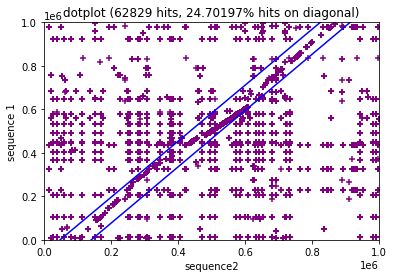

In [ ]:
seq1 = readSeq(hox_fa_add["human-hoxa-region.fa"])
seq2 = readSeq(hox_fa_add["mouse-hoxa-region.fa"])
kmerlen = 30

print("hashing seq1")
lookup = {}
for i in range(len(seq1) - kmerlen + 1):
    key = seq1[i:i + kmerlen]
    lookup.setdefault(key, []).append(i)

print("hashing seq2")
hits = []
for i in range(len(seq2) - kmerlen + 1):
    key = seq2[i:i + kmerlen]
    for hit in lookup.get(key, []):
        hits.append((i, hit))

makeDotplot(hits)

**Describe what you see. How many hits are there and what percentage fall near the diagonal? Do you observe any structure in the off-diagonal hits? What types of genomic elements could cause such a pattern? Why are matches that are close to the diagonal more likely than off-diagonal matches to represent "correct", or orthologous, alignments?**
**Answer here:** Closer to the diagnoal, the hits on the one side looks like the mirror image of another side, but as we move away from the line the pattern disappers. There are about 62829 hits and about 25% fall near the diagonal. There does not seem to be any pattern farther away from the diagnonal. They could be the hits in the background as 30 base pair may not necessarily represent any meaningful sequence. The matches that are close to the diagonal more likely than off-diagonal matches to represent corret alignments because they could be a part of some meaningful sequence as I imagine meaningful sequences preserve their spatial location in genome.

**B) Make the following modifications to the script and report how the plot changes qualitatively and quantatively (how many hits, what percentage are near the diagonal). Also briefly describe how you implemented each change.**

1. **Modify the script to find all *exact* matching 100-mers**
2. **Modify the script to find all 60-mers that match every *other* base**
3. **Modify the script to find all 90-mers that match every *third* base**
4. **Modify the script to find all 120-mers that match every *fourth* base**
5. **Modify the script to find all 100-mers that allow at *most two* mismatches in each contiguous block of six bases. Instead of modifying the script and generating the plot, focus on describing how you would implement this modification.**

**Use the following code and text block to implement your changes and record your results, respectively.**



hashing seq1
hashing seq2


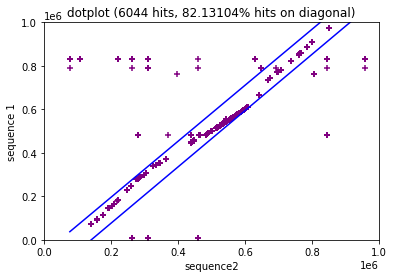

In [ ]:
seq1 = readSeq(hox_fa_add["human-hoxa-region.fa"])
seq2 = readSeq(hox_fa_add["mouse-hoxa-region.fa"])
kmerlen = 120

print("hashing seq1")
lookup = {}
for i in range(len(seq1) - kmerlen + 1):
    key = seq1[i:i + kmerlen:4]
    lookup.setdefault(key, []).append(i)

print("hashing seq2")
hits = []
for i in range(len(seq2) - kmerlen + 1):
    key = seq2[i:i + kmerlen:4]
    for hit in lookup.get(key, []):
        hits.append((i, hit))

makeDotplot(hits)

**Answer here:**

1. Changed the kmerlen to 100. All the hits only lie in the diagonal stripe. There are about 30 hits and 100% of them line the the diagonal stripe.
2. Changed the kmerlen to 60, and while genereating the keys skipped every 2nd letter(key = seq1[i:i + kmerlen:2]). 38.7% of the hits lie in the diagonal strip out of total 23933 hits. There is no obvious pattern.
3. Changed the kmerlen to 90, and while genereating the keys only every 3rd letter is picked. 93.8% of hits lie in the diagonal stripe out of total 8887 hits. Only 4 hits are out of the diagonal strip. In the diagonal strip, there are 4 clusters of hits, and the the cluster in the center of the strip is the densest.
4. Changed the kmerlen to 120, and while genereating the keys only every 4th letter is picked. 82.1% of hits lie in the diagonal stripe out of total 6044 hits. There are three clusters of htis in the diagonal strip, and the center custer is the densest.
5. First generate 1st 100-mer from each strand, and compare the six letters of the each 100-mers at a time(we can generate 6-mers for from the 100-mers to compare). Case 1, there is no mismatch, then shift the 6-letter frame to right by one letter and again compare. If case 1, occurs, shift right again by one letter. Case 2, if there is one mismatch, then shift the 6-letter frame to right by one letter and again compare. Case 3, if there is two mismatch, then shift the 6-letter frame to right by one letter and again compare. Case 4, if there is three mismatch, then reject the 100-mers. And now create, 2nd pair of 100-mers starting 95th position of the 1st 100-mers, and repeat 6-letter comparision at a time.  

**C) Although parts a, b.ii, b.iii, and b.iv require the same number of matching bases (30 = 60/2 = 90/3 = 120/4), one of them is more specific to the diagonal. Explain why this might be so.**

**Answer here:**
90/3 is more specifi to the diagonal perhaps because it lies between to little skips to catch hits in TATA boxes or too many skips to catch random hits caught by 120/4. Also Codens comes in the sequence of 3 length, so skipping ever three letter may help it catch the same reading frame.

**D) Explain the trade-off you see between number of hits near the diagonal (sensitivity) and the percentage of hits near the diagonal (specificity). How is the trade-off affected by the hashing parameters?**

**Answer here:** The more sensitive (that is smaller size k-mer) the hashing parameter is the specificity of hits is less( that is small portion of hits fall near diagonal). Conversely, the less sensitive the hasing parameter is the speficity of hits is more.

**E) Modify the script to also detect inversions. An inversion occurs when a stretch of DNA is spliced out and reinserted in reverse orientation. For example,**

**CGT[GATT]AGA**

**CGT[AATC]AGA**

**The `human-hoxa-region-modified.fa` file contains a version of the Hox region with an artificial inversion. Use the dotplot to locate the inversion in human. (Note: ignore the sensitivity measure, and only test all sizes necessary to detect the inversion). For convenience, the starter dotplot code is provided below.**



hashing seq1
hashing seq2


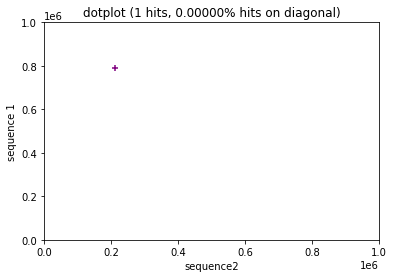

In [ ]:
seq1 = readSeq(hox_fa_add["human-hoxa-region.fa"])
seq2 = readSeq(hox_fa_add["human-hoxa-region-modified.fa"])



seq2=seq2[::-1]

kmerlen = 77


print("hashing seq1")
lookup = {}
for i in range(len(seq1) - kmerlen + 1):
    key = seq1[i:i + kmerlen]
    lookup.setdefault(key, []).append(i)

print("hashing seq2")
hits = []
for i in range(len(seq2) - kmerlen + 1):
    key = seq2[i:i + kmerlen]
    for hit in lookup.get(key, []):
        hits.append((i, hit))

makeDotplot(hits)

**Answer here:**
There is one 77-mer

#HMMs for GC-rich regions: State durations and limitations

An important use of HMMs is to decode or parse a genome into its biological components: exons, introns, regulatory regions, etc. In this problem, we will examine how the accuracy of HMM predictions is affected by certain inherent properties of the model.

In this problem, we will use GC content (the fraction of letters that are a C or a G) to classify the genome into high-GC regions (on average 60\% G or C) and Low-GC regions (on average 60\% A or T). These have different melting temperatures, different replication times across the cell cycle, and different gene density. They have also been hypothesized to have different evolutionary origins (see *isochores*}), but this hypothesis remains controversial.

**A) In most HMMs, the self-loop transition probabilities $a_{kk}$ are large, while the transition probabilities between different states $a_{kl}$ are small. Once a Markov chain with these transition probabilities enters state $k$, it tends to stay in state $k$ for a while. The *state duration* is the total number of consecutive steps at which the Markov chain stays in the same state, before switching to another state (e.g. transitioning into state $k$ and then transitioning out to a different state is a state duration of 1).  What is the expected (mean) state duration of state $k$ as a function of the transition probability $a_{kk}$? What is the distribution of state durations $P(D_{k}=d)$?**

**Answer here:**
The expected (mean) state duration of state k is $1/(1-a_{kk})$.
The distribution of state durations  P(Dk=d) is $a_{kk}^{n}*(1-a_{kk})$.

**B) Our simple model requires only two states. You will complete the code block below to implement the Viterbi algorithm.**

The nearly complete Viterbi algorithm does the following:

* Reads in a data file containing a DNA sequence and an authoritative (correct) annotation, consisting of a string of pluses and minuses, specifying where the High-GC and Low-GC regions are, respectively.
* Calculates the base composition of the High-GC and Low-GC regions and the mean length of High-GC and Low-GC regions. (All with respect to the authoritative annotation.)
* Performs Viterbi decoding on the DNA sequence, using a hard-coded HMM designed to detect High-GC and Low-GC regions. (This is the part you will complete.)
* Calculates the base composition of the High-GC and Low-GC regions and the mean length of High-GC and Low-GC regions. (All with respect to the Viterbi annotation.)
* Calculates the accuracy of the Viterbi decoding, defined as the percentage of predicted plus and minus states that match the authoritative annotation.

**This will allow you to decode several artificial genomes, and then compare the resulting predictions of High-GC and Low-GC regions to a provided (correct) annotation. Based on the HMM parameters hard-coded into the algorithm, what are the expected state durations for High-GC and Low-GC regions?**

**Ans**
The expected state durations for High-GC and Low-GC regions is 100

In [ ]:
###############################################################################
# HMM PARAMETERS
# Conventions: + refers to High-GC, and - refers to Low-GC. When indexing
#  states, 0 is + and 1 is -.
###############################################################################

state_idx = { '+' : 0, '-' : 1 }

# initial distribution over states, i.e. probability of starting in state k
init_dist = [0.5,0.5]

# transition probabilities
tr = [
    #  to+   to-
    [ 0.99, 0.01 ], # from+
    [ 0.01, 0.99 ]  # from-
]

# emission probabilities
em = [
    #    A     G     C     T
    [ 0.20, 0.30, 0.30, 0.20], # +
    [ 0.30, 0.20, 0.20, 0.30]  # -
]

###############################################################################
# ANNOTATION BENCHMARKING
###############################################################################

def basecomp(X, anno):
    counts = [[0] * 4, [0] * 4]
    for i in range(len(X)):
        counts[anno[i]][X[i]] += 1
    sum0 = sum(counts[0])
    sum1 = sum(counts[1])
    return [[x / sum0 for x in counts[0]], [x / sum1 for x in counts[1]]]

def region_lengths(anno):
    lengths = [[], []]
    curlen = 1
    for i in range(1, len(anno)):
        if anno[i] == anno[i - 1]:
            curlen += 1
        else:
            lengths[anno[i - 1]].append(curlen)
            curlen = 1
    lengths[anno[len(anno) - 1]].append(curlen)
    return lengths

def anno_accuracy(refanno, testanno):
    assert len(refanno) == len(testanno)
    return str(sum([x == y for x, y in zip(refanno, testanno)]) / len(refanno) * 100) + "%"

def basecomp_str(b):
    return "A=%.2f%% G=%.2f%% C=%.2f%% T=%.2f%%" % (100 * b[0], 100 * b[1], 100 * b[2], 100 * b[3])

def print_annostats(X, anno, label):
    lengths = region_lengths(anno)
    basecomps = basecomp(X,anno)

    print("High-GC mean region length: ", int(round(sum(lengths[0]) / len(lengths[0]))))
    print("High-GC base composition: ", basecomp_str(basecomps[0]))
    print("Low-GC mean region length: ", int(round(sum(lengths[1]) / len(lengths[1]))))
    print("Low-GC base composition: ", basecomp_str(basecomps[1]))

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
    ax1.set_title(label + " High-GC")
    ax1.hist(lengths[0], bins = 20)
    ax2.set_title(label + " Low-GC")
    ax2.hist(lengths[1], bins = 20)
    plt.show()

def print_summary(X, refanno, testanno):
    print("Authoritative annotation statistics")
    print("-----------------------------------")
    print_annostats(X, refanno, "Authoritative")
    print("")

    print("Viterbi annotation statistics")
    print("-----------------------------------")
    print_annostats(X, testanno, "Viterbi")
    print("")

    print("Accuracy: " + anno_accuracy(refanno, testanno))

###############################################################################
# VITERBI ALGORITHM (you must complete)
# Note: The length of the sequences we are dealing with is large enough that it
#       is necessary to use log-probabilities for numerical stability. You will
#       need to adapt the formulae accordingly.
###############################################################################

def viterbi(X):
    """Returns the Viterbi path for the emission sequence X.
    X should be a list of integers, 0=A, 1=G, 2=C, 3=T.
    The returned Y is a list of integers, 0=High-GC, 1=Low-GC.
    """
    N = len(tr)
    L = len(X)
    assert len(em) == N
    V = [[0]*N for _ in range(L)]
    TB = [[0]*N for _ in range(L)]
    for i in range(L):
        Vprev = []
        if i == 0:
            Vprev = [log(pk0) for pk0 in init_dist]
        else:
            Vprev = V[i-1]
        for k in range(N):
            # YOUR CODE HERE
            trintm=[Vprev[m]+log(tr[m][k]) for m in range(N)]
            emmintm=log(em[k][X[i]])
            V[i][k]=emmintm+max(trintm)
            TB[i][k]=trintm.index(max(trintm))

            # Set V[i][k] to the appropriate value for the Viterbi matrix, based
            #  on Vprev (V[i-1]) and the model parameters.
            # Set TB[i][k] to the selected previous state (0 or 1 corresponding
            #  to + or -)
            # To receive full credit, your code should in theory work on any
            #  valid emission and transition matrices, not just the ones hard-
            #  coded into this program.
            # See note about log probabilities above.

    # perform traceback and return the predicted hidden state sequence
    Y = [-1 for i in range(L)]
    _, yL = max([ (V[L - 1][k], k) for k in range(N)])
    Y[L - 1] = yL
    for i in range(L - 2, -1, -1):
        Y[i] = TB[i + 1][Y[i + 1]]
    return Y

You will need to download the following [files](https://www.dropbox.com/sh/fvj6x0yxy6lpy6x/AAAb4Ufph_QgN3zlRBMAyyaqa?dl=0) and upload them to colab using the following code block.

In [ ]:
hmm = files.upload()
for k, v in hmm.items():
    hmm[k] = v.decode("utf-8").split("\n")

Saving hmmgen to hmmgen
Saving mystery1 to mystery1
Saving mystery2 to mystery2
Saving mystery3 to mystery3


**C) Run the following code block to apply your Viterbi implementation to the data file `hmmgen`, which was generated using the same HMM, and verify that your program achieves 83% accuracy.**

Authoritative annotation statistics
-----------------------------------
High-GC mean region length:  100
High-GC base composition:  A=20.01% G=29.87% C=30.02% T=20.10%
Low-GC mean region length:  102
Low-GC base composition:  A=29.63% G=19.94% C=20.20% T=30.23%


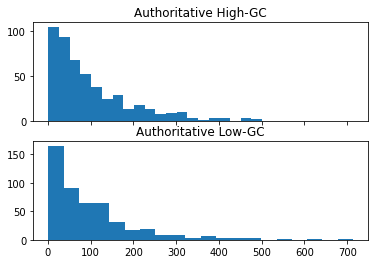


Viterbi annotation statistics
-----------------------------------
High-GC mean region length:  350
High-GC base composition:  A=20.37% G=29.55% C=29.58% T=20.49%
Low-GC mean region length:  354
Low-GC base composition:  A=29.31% G=20.22% C=20.60% T=29.87%


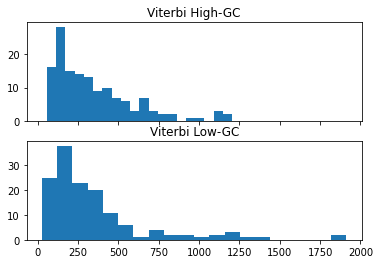


Accuracy: 83.315%


In [ ]:
seq = [base_idx[bp] for bp in hmm['hmmgen'][0]]
ref = [state_idx[ann] for ann in hmm['hmmgen'][1]]
test = viterbi(seq)

print_summary(seq, ref, test)

**D) The following code block applies your Viterbi implementation to 3 mystery files (`mystery1`, `mystery2`, and `mystery3`). How do the (correct) state duration distributions in the mystery sequences differ and what do they have in common? What accuracy levels does your HMM achieve on these sequences? How does each Viterbi-predicted state duration distribution differ from the correct distribution?**

**Ans** The correct state duration distribution in the mystery sequences have consistently longer average High GC region, and low GC region length. Moreover, they have similar distribution shape. They slightly differ from each other in the height of the individual bars in their distribution.

Accuracy:
M1:71.96%
M2:68.79%
M3:67.71%

For M2, and M3, the Viterbi-predicted state duration distribution is normal shaped, while correct distribution is similar to the right half of the normal distriution.

For M1, the Viterbi-predicted state duration distribution is uniform, but the correct distribution is similar to the right half of the normal distriution.



Authoritative annotation statistics
-----------------------------------
High-GC mean region length:  100
High-GC base composition:  A=19.94% G=29.87% C=30.20% T=20.00%
Low-GC mean region length:  101
Low-GC base composition:  A=29.87% G=20.27% C=19.73% T=30.13%


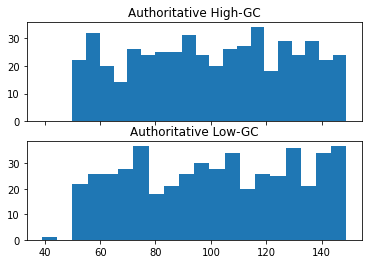


Viterbi annotation statistics
-----------------------------------
High-GC mean region length:  234
High-GC base composition:  A=20.51% G=29.18% C=29.40% T=20.91%
Low-GC mean region length:  220
Low-GC base composition:  A=29.62% G=20.66% C=20.20% T=29.52%


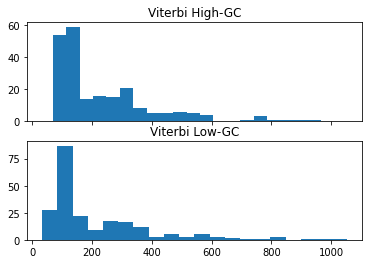


Accuracy: 71.962%


Authoritative annotation statistics
-----------------------------------
High-GC mean region length:  100
High-GC base composition:  A=19.85% G=29.78% C=30.07% T=20.30%
Low-GC mean region length:  100
Low-GC base composition:  A=29.84% G=19.86% C=19.99% T=30.31%


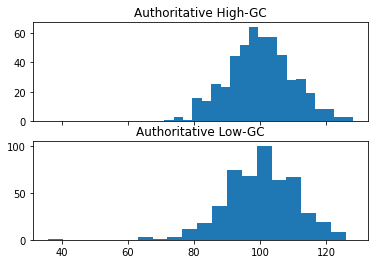


Viterbi annotation statistics
-----------------------------------
High-GC mean region length:  215
High-GC base composition:  A=20.56% G=29.15% C=29.46% T=20.83%
Low-GC mean region length:  212
Low-GC base composition:  A=29.16% G=20.45% C=20.56% T=29.83%


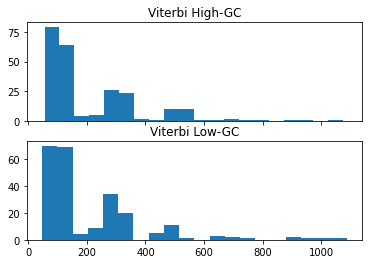


Accuracy: 68.798%


Authoritative annotation statistics
-----------------------------------
High-GC mean region length:  100
High-GC base composition:  A=19.81% G=29.71% C=30.56% T=19.91%
Low-GC mean region length:  100
Low-GC base composition:  A=29.56% G=20.09% C=20.11% T=30.24%


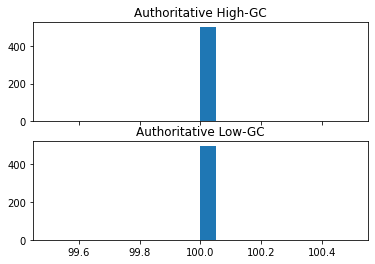


Viterbi annotation statistics
-----------------------------------
High-GC mean region length:  222
High-GC base composition:  A=20.56% G=29.05% C=29.84% T=20.55%
Low-GC mean region length:  207
Low-GC base composition:  A=29.10% G=20.46% C=20.53% T=29.91%


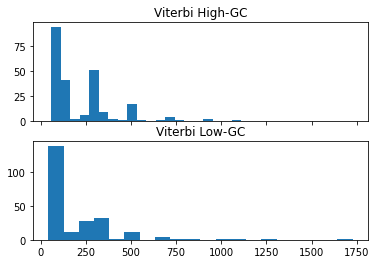


Accuracy: 67.718%




In [ ]:
for i in range(1, 4):
    seq = [base_idx[bp] for bp in hmm['mystery' + str(i)][0]]
    ref = [state_idx[ann] for ann in hmm['mystery' + str(i)][1]]
    test = viterbi(seq)
    print_summary(seq, ref, test)
    print("\n")

**E) Would re-training the HMM parameters according to the procedure described in lecture, using the correct annotations as training data, improve the accuracy of the Viterbi annotation for the mystery sequences? Why or why not?**

**(Extra credit) Try to make the decoder perform better by adjusting the hard-coded model parameters. If you succeed, can you explain why?**

**Answer here:** Yes, because retraining would tune the transition parameters to the nature of the data. So the accuracy might improve.

**F) As you are now aware, the length distribution of genomic elements can strongly affect the predictive accuracy of an HMM used to decode them. Unfortunately, most elements in real genomes do not follow the length distribution you derived in part (A). By reading the following paper (or any other sources), describe how the gene under GENSCAN addresses this issue. How is it possible, algorithmically, to use state duration distributions that differ from the one you derived in part (A)?**

**Burge C, Karlin S. Prediction of complete gene structures in human genomic DNA. J Mol Bio 268(1):78-94, 1997.**

**Answer here:** The GENSCAN uses a fifth-order Markov model that calculates the probability of the sixth base based on the previous five bases in the sequence. In addition GENSCAN also accounts for the probability of occurrence of the state depending on the position within the sequence by including inhomogenous Markov model.  

# Evolutionary Signature of Motifs

In this problem, you will search for enriched (over-represented) $k$-mers in regions conserved across the yeast clade *Saccharomyces*.

You will need to download the following [files](https://www.dropbox.com/sh/tx0p18sx4daw50t/AAC5_T1bRboHw_Di7sjxgpuya?dl=0) and upload them to colab using the following code block.

In [ ]:
intergenic = files.upload()
for k, v in intergenic.items():
    intergenic[k] = v.decode("utf-8-sig")

Saving allinter to allinter
Saving allintercons to allintercons


A) We have provided the sequence of all intergenic regions in S. *cerevisiae* in
`allinter`. We have also provided an annotation of conservation in `allintercons`. Each position marked with * (everything else is considered nonconserved) corresponds to a conserved nucleotide. For simplicity, we will look for motifs which are non-degenerate, exact matches. In other words, a conserved motif consists entirely of conserved nucleotides.

Compute the frequency and conservation of all 6-mers. Report the 50 most frequently occurring and 50 most conserved motifs (those with the highest proportion of conserved instances) as python lists.

In [ ]:
# Intergenic regions: intergenic["allinter"]
# Annotation of conservation: intergenic["allintercons"]

### YOUR CODE HERE ###
seq1 = readSeq(intergenic["allinter"])
seq2 = readSeq(intergenic["allintercons"])
kmerlen = 6
print(seq1[1:100])
print('----')
print(seq2[1000:2000])
print("hashing seq1")
lookup = {}
result={}
lookup2={}
result2={}
for i in range(len(seq1) - kmerlen + 1):
    key = seq1[i:i + kmerlen]
    if '#' in key or '-' in key:
      continue
    lookup.setdefault(key, []).append(i)
    if key in lookup:
        result[key]=result.get(key,0)+1
    key2 = seq2[i:i + kmerlen]
    lookup2.setdefault(key2, []).append(i)
    if key2 =='******':
        result2[key]=result2.get(key,0)+1

for k in result2:
  if k in result:
    result2[k]=result2[k]/result[k]


result=dict(sorted(result.items(), key=lambda item: item[1], reverse=True))
result2=dict(sorted(result2.items(), key=lambda item: item[1], reverse=True))
resultlis=[]
for key in result:
  resultlis.append(key)

result2lis=[]
for key in result2:
  result2lis.append(key)
#print(list(result.items())[:50])
#print(len(list(result.items())[:50]))
#print(resultlis[:50])
print(list(result.items())[:50])

#print(result2lis[:50])
#print(list(result2.items())[:50])
#print(len(list(result2.items())[:50]))
print(list(result2.items())[:50])




TAAAAATAATTATAACCTTTTTTATAATTATATATAATAATAATATATATTATCAAATAATTATTATTTCTTTTTTTTCTTTAATTAATTAATTAATTA
----
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

**Answer here:**

Most frequently occurring:['AAAAAA', 'TTTTTT', 'TATATA', 'ATATAT', 'AAAAAT', 'ATTTTT', 'GAAAAA', 'TTTTTC', 'AAAATA', 'TAAAAA', 'AATAAA', 'ATAAAA', 'TATTTT', 'AAGAAA', 'AAATAA', 'CTTTTT', 'AGAAAA', 'TTTCTT', 'TTATTT', 'AAAAAG', 'TTTTTA', 'TTTTAT', 'TTTATT', 'TTTTCT', 'AAAGAA', 'ATAATA', 'TTCTTT', 'ATATAA', 'TATTAT', 'AATATA', 'TCTTTT', 'AAATAT', 'ATATTT', 'AAAAGA', 'TTATAT', 'AATTTT', 'TATATT', 'AAAATT', 'AATAAT', 'AATATT', 'TAAATA', 'ATTATT', 'AAATTT', 'TATAAA', 'TAATAA', 'ATATTA', 'TATTTA', 'TAATAT', 'TTTATA', 'ATAAAT']

Most conserved: ['CGGGTA', 'TACCCG', 'CCGGGT', 'ACCCGG', 'CACGTG', 'ACGCGT', 'GGGTAA', 'TTACCC', 'GCGGCT', 'CGCGTC', 'CGGCTA', 'CTCATC', 'GCGATG', 'CACCCG', 'GATGAG', 'GCGGGT', 'CGATGA', 'TTCGCG', 'GAGTCA', 'GCGCGA', 'GGGTGG', 'TCATCG', 'GGCGGC', 'ACCCGC', 'GCCCCT', 'TGGGTG', 'CAGGGG', 'GCCGCC', 'CCGATA', 'TCGCGT', 'GTCGAC', 'GTCGCG', 'CGTCGC', 'CATCGC', 'GACGCG', 'TAGCCG', 'ACGCGA', 'CCCGAG', 'CTCGAG', 'CCCCTG', 'GGTTCG', 'CGCGTT', 'GGAGTC', 'AGCCGC', 'CCGAGC', 'CGGCGG', 'TGACTC', 'AACGCG', 'CGCGAG', 'GTACGG']

B) Compare frequently occurring motifs to highly conserved motifs. Are there biases in the sequence properties of either class? If so, where does this bias come from?
The frequently occuring motifs are biased towards more A, and T. Whereas, the conserved motifs are slighlty biased towards C, and G. Frequent motifs could be picked from background, and/or poly A tails. However, Conserved motifs could be picked from promoter region which has higher CpG island.

Which of the two lists should we use to direct further inquiry into yeast transcription factor binding sites? Provide justification.

I would pick highly conserved, because conservation indicate functional, and it make sense that transcriptional factor binding sites should be conserved as they are functional areas.

**Answer here:**
The frequently occuring motifs are biased towards more A, and T. Whereas, the conserved motifs are slighlty biased towards C, and G. Frequent motifs could be picked from background, and/or poly A tails. However, Conserved motifs could be picked from promoter region which has higher CpG island.

I would pick highly conserved, because conservation indicate functional, and it make sense that transcriptional factor binding sites should be conserved as they are functional areas.